In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_train = Scaler.fit(df).transform(df)

In [5]:
Y_train = df['label']
df.pop('label')
X_train = df

In [6]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size = 0.2)

In [9]:
%matplotlib inline

In [11]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(n_jobs=-1)
clf.fit(X_train,Y_train)

/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))

In [13]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = True)
print_score(clf, X_train, X_test, Y_train, Y_test, train = False)

Train Result : 

Accuracy Score 0.8793

Classification Report : 
              precision    recall  f1-score   support

          0       0.97      0.96      0.97      3305
          1       0.99      0.79      0.88      3740
          2       0.75      0.94      0.84      3336
          3       0.88      0.88      0.88      3482
          4       0.94      0.86      0.90      3235
          5       0.87      0.82      0.85      2997
          6       0.93      0.93      0.93      3314
          7       0.92      0.92      0.92      3558
          8       0.79      0.79      0.79      3255
          9       0.79      0.91      0.85      3378

avg / total       0.89      0.88      0.88     33600
 

Confusion Metrics : 
 [[3162    1   29    4    4   12   51    3   18   21]
 [   0 2970  333   18    0   26    9    6  368   10]
 [   4    2 3136   28   28    9   24   33   56   16]
 [  14    3  169 3053    2  107   25   22   40   47]
 [   3    5   33   11 2773   14   18   21   35  322]
 [  19

/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Fut

Average Accuracy : 0.8695

Accuracy SD : 0.0150

Test Result : 

Accuracy Score 0.8639

Classification Report : 
              precision    recall  f1-score   support

          0       0.97      0.94      0.96       827
          1       0.99      0.79      0.88       944
          2       0.72      0.92      0.81       841
          3       0.88      0.87      0.87       869
          4       0.93      0.82      0.87       837
          5       0.86      0.82      0.84       798
          6       0.92      0.91      0.91       823
          7       0.92      0.90      0.91       843
          8       0.78      0.77      0.78       808
          9       0.75      0.90      0.82       810

avg / total       0.87      0.86      0.87      8400


Confusion Metrics : 
 [[779   0  11   3   1   4  17   0   6   6]
 [  0 744  93   6   1  13   3   3  76   5]
 [  5   1 777   1   9   5  10   8  20   5]
 [  2   0  48 752   0  27   6  10  11  13]
 [  1   1  20   1 689   4   8   3  17  93]
 [  5   1

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca =PCA(n_components=60)

In [23]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

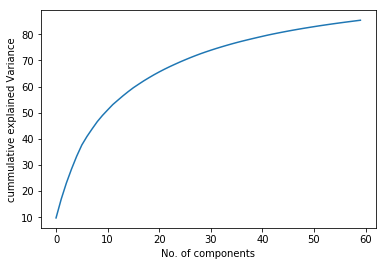

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [25]:
X_pca = pca.transform(X_train)
X_pca.shape

(33600, 60)

In [18]:
s

/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_pca_test = pca.transform(X_test)

In [21]:
print_score(clf, X_train, X_test, Y_train, Y_test, train = True)
print_score(clf, X_train, X_test, Y_train, Y_test, train = False)

Train Result : 

Accuracy Score 0.9323

Classification Report : 
              precision    recall  f1-score   support

          0       0.97      0.98      0.97      3305
          1       0.97      0.98      0.97      3740
          2       0.94      0.91      0.92      3336
          3       0.91      0.91      0.91      3482
          4       0.94      0.94      0.94      3235
          5       0.92      0.87      0.89      2997
          6       0.95      0.97      0.96      3314
          7       0.95      0.94      0.95      3558
          8       0.87      0.90      0.88      3255
          9       0.90      0.90      0.90      3378

avg / total       0.93      0.93      0.93     33600
 

Confusion Metrics : 
 [[3240    0    3    4    4   11   18    0   20    5]
 [   0 3665   16   10    2    5    5    2   33    2]
 [  13   16 3046   49   30    7   31   34  105    5]
 [  10   11   67 3178    1   70   12   22   76   35]
 [   7    9   13    4 3045    3   14   10   31   99]
 [  23

/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/shivam/.conda/envs/irisproject/lib/python3.6/site-packages

Average Accuracy : 0.9100

Accuracy SD : 0.0059

Test Result : 

Accuracy Score 0.9169

Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.97      0.96       827
          1       0.95      0.97      0.96       944
          2       0.92      0.89      0.91       841
          3       0.89      0.89      0.89       869
          4       0.94      0.92      0.93       837
          5       0.89      0.86      0.88       798
          6       0.94      0.95      0.95       823
          7       0.93      0.92      0.92       843
          8       0.85      0.88      0.86       808
          9       0.89      0.90      0.89       810

avg / total       0.92      0.92      0.92      8400


Confusion Metrics : 
 [[800   0   3   6   2   1   7   1   7   0]
 [  0 920   2   4   1   4   2   2   6   3]
 [  6  11 751  10  11   4   9  12  25   2]
 [  1   2  22 776   1  25   2  13  17  10]
 [  2   3   5   2 774   3   8   1  13  26]
 [  7   3

In [18]:
from sklearn.svm import SVC

In [19]:
clf = SVC(C=1.0, kernel='rbf')

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
print_score(clf, X_pca, X_pca_test, Y_train, Y_test, train = True)
print_score(clf, X_pca, X_pca_test, Y_train, Y_test, train = False)